# 🐍 Python | Automatically Download YouTube Subtitles 📝

## ❓Ever wanted to grab subtitles from a video to study languages, summarize content, or boost accessibility?

## 👉 With `youtube_dl` and `pysrt`, it's just a few lines of code away!

## 🔧 How does it work?
(๑•̀ㅂ•́)و✧ We fetch the captions from a YouTube link and convert them into plain text you can analyze, translate, or feed into your NLP projects.

## 🔎 Why does it matter?
(｡♥‿♥｡) This approach enables:
•✍️ Automatic dataset generation from video content.  
•🌐 Better accessibility and language learning.  
•🧠 Trend analysis from educational or scientific media.

## ✨ Real-world example:
Let’s say you want to study how AI is taught online. You download subtitles from 10 top YouTube videos, clean the text, analyze it for patterns and keywords. Voilà! A real-world dataset for your next NLP model 🌍

## ⚙️ Business impact:
•📈 Speeds up educational content generation.  
•🦾 Powers real-world NLP model training.  
•💬 Enhances multilingual customer support.

## 📊 Code summary:
•🎥 Download `.srt` subtitles from YouTube.  
•🧽 Clean and format subtitle content.  
•🔠 Extract top keywords with `sklearn`.

## 🔗 [Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

## 💭 Reflection:
How would you use video subtitles in your AI or data workflows? 🎓

🔑 Hashtags:
#datascience #python #youtube #machinelearning #nlp #ai #deeplearning #generativeai #education #accessibility #neurodiversity #openai #upskilling #techtok #youngscientists

---

🗣️ Available subtitle languages:
 - ar
 - zh-HK
 - zh-TW
 - hr
 - cs
 - da
 - nl
 - en
 - en-GB
 - et
 - fil
 - fi
 - fr-CA
 - fr-FR
 - de
 - el
 - iw
 - hu
 - id
 - it
 - ja
 - ko
 - lv
 - lt
 - ms
 - no
 - pl
 - pt-BR
 - pt-PT
 - ro
 - ru
 - sk
 - es-419
 - es-ES
 - sv
 - th
 - tr
 - uk
 - ur
 - vi
✅ Converted 2lAe1cqCOXo.en.vtt to 2lAe1cqCOXo.en.srt   


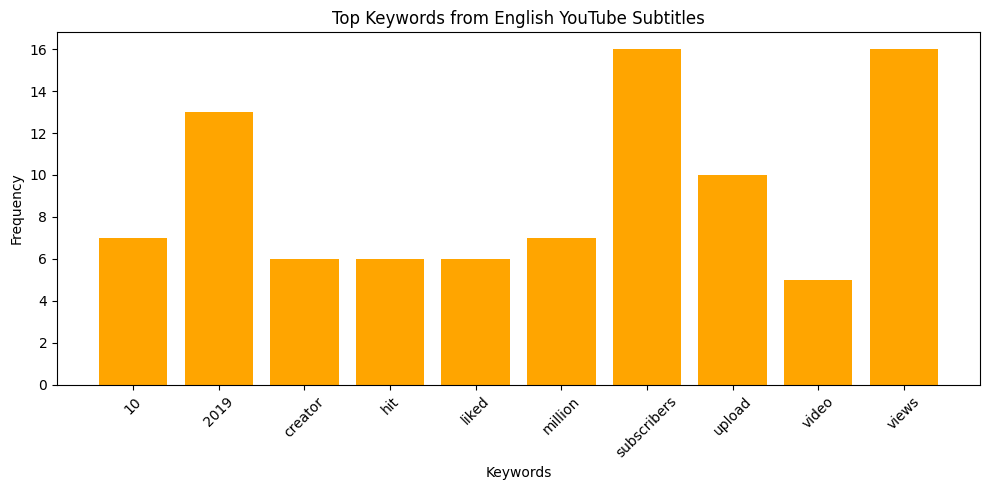

In [19]:
import os
import re
import pysrt
import yt_dlp
import webvtt  # Needed to convert .vtt to .srt format
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# URL of the YouTube video
video_url = 'https://www.youtube.com/watch?v=2lAe1cqCOXo'

# 1. Extract metadata to check available subtitle languages
ydl_opts_info = {
    'skip_download': True,
    'quiet': True,
    'no_warnings': True
}
with yt_dlp.YoutubeDL(ydl_opts_info) as ydl:
    info = ydl.extract_info(video_url, download=False)
    video_id = info.get('id', 'video')
    subs = info.get('subtitles', {})  # Manual subtitles
    auto_subs = info.get('automatic_captions', {})  # Auto-generated subtitles

# Merge both subtitle dictionaries
all_subs = {**subs, **auto_subs}

# Show available languages
print("🗣️ Available subtitle languages:")
for lang_code in all_subs.keys():
    print(f" - {lang_code}")

# 2. Download English subtitles (preferably .vtt format)
download_opts = {
    'skip_download': True,
    'quiet': True,
    'no_warnings': True,
    'writesubtitles': True,
    'writeautomaticsub': True,
    'subtitleslangs': ['en'],
    'subtitlesformat': 'vtt',
    'outtmpl': f'{video_id}.%(ext)s'
}
with yt_dlp.YoutubeDL(download_opts) as ydl:
    ydl.download([video_url])

# 3. Convert .vtt to .srt if necessary
vtt_file = f'{video_id}.en.vtt'
srt_file = f'{video_id}.en.srt'

if os.path.exists(vtt_file):
    webvtt.read(vtt_file).save_as_srt(srt_file)
    print(f"✅ Converted {vtt_file} to {srt_file}")

# 4. Read and clean subtitle text
subs = pysrt.open(srt_file)
full_text = " ".join([sub.text for sub in subs])  # Join all subtitle lines
cleaned_text = re.sub(r'\[.*?\]|[^\w\s]', '', full_text)  # Remove punctuation and tags

# 5. Extract top keywords using bag-of-words model
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform([cleaned_text])
keywords = vectorizer.get_feature_names_out()
counts = X.toarray().flatten()

# 6. Plot the top keywords
plt.figure(figsize=(10, 5))
plt.bar(keywords, counts, color='orange')
plt.title('Top Keywords from English YouTube Subtitles')  # No emoji to avoid font warnings
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
